# CSCI2000U - Final Project


### Introduction

We chose this dataset pulled off of Kaggle because it pertains to movies and tv series, which everyone in the group is familiar with, and also has an interest in. Going through other datasets, we were often disappointed either by the lack of data, or the range of categories that are covered within the dataset. This dataset was able to do what we needed: have lots of data we can parse, and have lots of columns we can work with.

We initially looked at using sets such a Utility Cut permits or chemical tracking data for the city of Toronto, but they either didn't have enough data to reasonably work with or weren't interesting to everyone in the group.

Due to this, we decided to go with the IMDB's most popular films and series set.



##### These are the list of questions we wish to answer, and expand upon in our analysis:
   - How does the amount of episodes in a tv show effect the ratings? For shows with a greater amount of episodes,
        are the average rating worse, or better than shows with fewer?
   - What are considered popular genres over the years? Do the ratings correlate? 
   - What impact does mature content make on the ratings of movies/shows the most?
   - Do TV series or movies perform better? Based on the year of publish, does this make an impact or change the ratings?
   - ADDITIONAL QUESTION GOES HERE

###### Members and contributions:

Ashar Izhar ->

Bridget Green ->

Cameron Millar ->

Julian Finley -> 


### Description of Data

The IMDB's most popular film and series dataset is a list described by its name. In this dataset we can see a range of movies and films from the early 20th century to the current year, with information about the movie such as duration, genre, number of episodes, as well as user engagement information such as ratings and votes. All these datapoints can prove to be useful when diving into the analysis of said data.

The data was collected by the dataset creator using web scraping directly from the IMDB website, and then compiled within a csv file for ease of use.

Full credits go towards the compiler of the dataset; Mazen Ramadan, with a link to the set itself: https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series

Information from this dataset was retrieved from the original source: https://www.imdb.com/


### Analysis of the data

The data is organized in such a manner thatis easy to identify their use case and how they can be manipulated. Below is the list of columns within the dataset, and their description:

    Name: The title of the film or tv series
    Date: The date by year
    Rate: The IMDB rating given for the title
    Votes: The number of user votes which have contributed the the votes column
    Genre: The genre(s) of the film or tv series. Multiple can be listed per title
    Duration: The running length in minutes for the film or tv series per episode.
    Type: The indicator on whether this is a film or tv series
    Certificate: The audiance and/or age rating for the title(TV-Y, PG, PG-13, etc)
    Episodes: If this is a tv series, the number of episodes present is recorded
    Adult oriented content present(from mild, moderate, severe):
        -Nudity
        -Violence
        -Profanity
        -Alcohol
        -Frightening
      
The data quality holds up, and any missing data present is due to it either being non-existant(i.e., no adult content being in an all ages movie), or no votes/ratings(no user engagement with the film or tv series).

Data that would be prudent to double check for integrity and cleaning would be:
    -Completely empty columns
    -Missing or non-numerical dates
    -Removal of 'No Rates' when doing analysis on the ratings column
    -Removal of 'No Votes' when doing analysis on the votes column
    -If the genre column has more than one genre, make sure all are taken into account for their appropriate use cases.
    -Removal of 'None' when doing analysis on the duration column
    -When doing analysis on the type column, specify directly which will be worked with
    -Remove all non-numerical from episode column if working with tv series
    -When working will adult content, remove 'No Rate' ent

### Exploratory Data Analysis

### Potential Data Science

### Conclusion

Data Site
https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series
    

Description: The dataset is about the ratings of different movies and TV series on IMDB. It includes information such as;
- Name: The Name
- Date: Creation date
- Rate: IMDB's Rating
- Votes: Number of voters
- Genre: The Genre
- Duration: The Duration of the episode , film
- Type: whether it's film or series
- Certificate: The Certificate (TV-Y, PG, PG-13, etc)
- Episodes: Number of episodes for TV series
- How much adult content is present  

This data was collected  using Web Scraping. 


Getting to know your data 

In [1]:
import csv
import re
from functools import reduce
import numpy as np

def get_data_csv():
    collection = []
    with open('imdb.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

In [2]:
import json

#Date Range
maxYear = max(data, key=lambda item:item['Date'])
minYear = min(data, key=lambda item:item['Date'])
print ("Range in years:", (minYear['Date']), "-", (maxYear['Date']))

#Number of records
print("# of data records:", len (data))

#Unique genres by length
uniqueGenres = set(item['Genre'] for item in data)
print("# of unique genres: ", len(uniqueGenres))

#Unique titles by type
uniqueFilms = list(filter(lambda item: 'Film' in item['Type'], data))
uniqueSeries = list(filter(lambda item: 'Series' in item['Type'], data))
print("# of unique movies: ", len(uniqueFilms))
print("# of unique shows: ", len(uniqueSeries))

#Unique ratings by length
uniqueRatings = set(item['Rate'] for item in data)
print("# of unique ratings: ", len(uniqueRatings))

#Top 3 records
print("Top 5 records:", json.dumps(data[:3],indent=4),'\n')

Range in years: 1922 - 2023
# of data records: 6178
# of unique genres:  377
# of unique movies:  4446
# of unique shows:  1732
# of unique ratings:  77
Top 5 records: [
    {
        "Name": "No Time to Die",
        "Date": "2021",
        "Rate": "7.6",
        "Votes": "107,163",
        "Genre": "Action, Adventure, Thriller",
        "Duration": "163 ",
        "Type": "Film",
        "Certificate": "PG-13",
        "Episodes": "-",
        "Nudity": "Mild",
        "Violence": "Moderate",
        "Profanity": "Mild",
        "Alcohol": "Mild",
        "Frightening": "Moderate"
    },
    {
        "Name": "The Guilty",
        "Date": "2021",
        "Rate": "6.3",
        "Votes": "64,375",
        "Genre": "Crime, Drama, Thriller",
        "Duration": "90 ",
        "Type": "Film",
        "Certificate": "R",
        "Episodes": "-",
        "Nudity": "None",
        "Violence": "None",
        "Profanity": "Severe",
        "Alcohol": "None",
        "Frightening": "Moderate"


We chose this data set because it pertains to movies and TV series, which everyone in the group is already familiar with. It also has plenty of data to work with.

We looked at using sets like Utility Cut permits or chemical tracking data for the city of Toronto, but they either didn't have enough data to reasonably work with or weren't interesting to anyone in the group.

Questions:
   - Which genres of movie perform the best?
   - Which genres of show perform the best?
   - Do shows with greater episode count perform better or worse?
   - Do TV series or movies perform better?
   - How do movies/shows with more adult content perform?

We can expect to apply covariance, comparisons and correlation between data points.

This could be used to predict what kind of shows/movies would be most successful to make, as well as to visualize the success of already existing movies and shows.



Episodes vs Ratings
-------------------------

In [3]:
##To answer question 3, it may be a good idea to reword it

#"How does the amount of episodes in a tv show effect the ratings? For shows with a greater amount of episodes, 
# are the average rating worse, or better than shows with fewer?"
import pandas as pd
import numpy as np

df = pd.DataFrame(data)

In [4]:
newDf = df[df['Rate'] != 'No Rate']
newDfSeries = newDf.loc[df['Type'] == 'Series']
newDfSeries['Episodes'] = newDfSeries['Episodes'].astype(int)
newDfSeries['Rate'] = newDfSeries['Rate'].astype(float)
newDfSeries['Date'] = newDfSeries['Date'].astype(int)

newDfSeries = newDfSeries.sort_values(by=['Episodes'], ascending=False)

print(len(newDfSeries))
newDfSeries

1692


/tmp/ipykernel_295/4041139915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfSeries['Episodes'] = newDfSeries['Episodes'].astype(int)
/tmp/ipykernel_295/4041139915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfSeries['Rate'] = newDfSeries['Rate'].astype(float)
/tmp/ipykernel_295/4041139915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2075,Days of Our Lives,2021,5.1,"6,506","Drama, Romance",60,Series,TV-14,14301,Moderate,Mild,Mild,Moderate,Mild
2514,The Young and the Restless,2021,5.1,"5,978","Drama, Romance",60,Series,TV-14,12277,Moderate,Severe,Severe,Mild,Mild
2807,Coronation Street,2020,5.6,"5,202","Drama, Romance",30,Series,TV-PG,10336,Mild,Moderate,Mild,Mild,Mild
4257,Neighbours,2014,5.4,"5,020","Drama, Romance",22,Series,TV-G,9059,Mild,Mild,Mild,Mild,Mild
5407,Neighbours,2014,5.4,"5,020","Drama, Romance",22,Series,TV-G,9059,Mild,Mild,Mild,Mild,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Wild Crime,2006,7.7,168,"Documentary, Crime, Mystery",None,Series,None,4,No Rate,No Rate,No Rate,No Rate,No Rate
5545,Platinum End,2020,8.3,200,"Animation, Action, Drama",None,Series,None,4,No Rate,No Rate,No Rate,No Rate,No Rate
2455,Takt Op. Destiny,1985,8.5,291,"Animation, Action, Adventure",24,Series,TV-14,3,No Rate,No Rate,No Rate,No Rate,No Rate
2120,The Problem with Jon Stewart,2014,7.6,443,Talk-Show,None,Series,TV-MA,3,None,Moderate,Severe,None,Severe


In [5]:
perc = 25
print(int(len(newDfSeries)*(perc/100)))
topPerc = newDfSeries.head(int(len(newDfSeries)*(perc/100)))
botPerc = newDfSeries.tail(int(len(df)*(perc/100)))
print("top 25%: ", topPerc['Rate'].astype(float).mean())
print("bottom 25%: ", botPerc['Rate'].astype(float).mean())


423
top 25%:  7.397635933806146
bottom 25%:  7.541191709844559


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2075,Days of Our Lives,2021,5.1,"6,506","Drama, Romance",60,Series,TV-14,14301,Moderate,Mild,Mild,Moderate,Mild
2514,The Young and the Restless,2021,5.1,"5,978","Drama, Romance",60,Series,TV-14,12277,Moderate,Severe,Severe,Mild,Mild
2807,Coronation Street,2020,5.6,"5,202","Drama, Romance",30,Series,TV-PG,10336,Mild,Moderate,Mild,Mild,Mild
4257,Neighbours,2014,5.4,"5,020","Drama, Romance",22,Series,TV-G,9059,Mild,Mild,Mild,Mild,Mild
5407,Neighbours,2014,5.4,"5,020","Drama, Romance",22,Series,TV-G,9059,Mild,Mild,Mild,Mild,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Wild Crime,2006,7.7,168,"Documentary, Crime, Mystery",None,Series,None,4,No Rate,No Rate,No Rate,No Rate,No Rate
5545,Platinum End,2020,8.3,200,"Animation, Action, Drama",None,Series,None,4,No Rate,No Rate,No Rate,No Rate,No Rate
2455,Takt Op. Destiny,1985,8.5,291,"Animation, Action, Adventure",24,Series,TV-14,3,No Rate,No Rate,No Rate,No Rate,No Rate
2120,The Problem with Jon Stewart,2014,7.6,443,Talk-Show,None,Series,TV-MA,3,None,Moderate,Severe,None,Severe


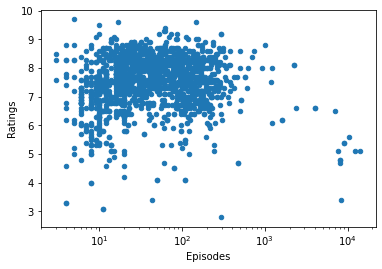

In [6]:
##someDf = newDf[~newDf['Rate'].str.contains('No Rate')]
#df_pivot = newDf.pivot_table(index=['Rate'], columns=['Episodes'], aggfunc='size', fill_value=0)
#df_pivot
#df_pivot.plot(xlabel='Rating', ylabel='Episodes No.', title='Ratings bys No. Episodes', kind='bar')


newDfSeries.plot(xlabel='Episodes', ylabel='Ratings', x='Episodes',y='Rate', kind='scatter', logx=True)
#newDf.dtypes
newDfSeries

<AxesSubplot:xlabel='Episodes', ylabel='Ratings'>

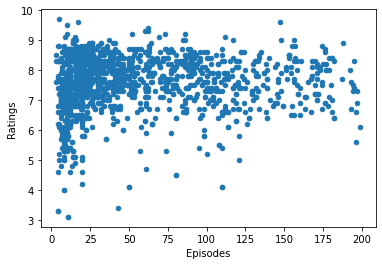

In [7]:
newDfSeries2 = newDfSeries[~(newDfSeries['Episodes'] >= 200)]
newDfSeries2.plot(xlabel='Episodes', ylabel='Ratings', x='Episodes', y='Rate', kind='scatter')

Series by Year vs Ratings
-----------------

<AxesSubplot:xlabel='Years', ylabel='Ratings'>

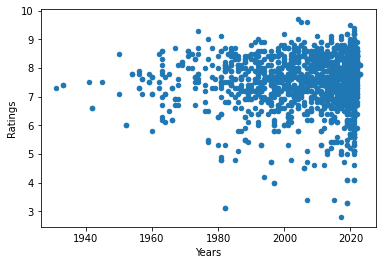

In [8]:
newDfSeries.plot(xlabel='Years', ylabel='Ratings', x='Date',y='Rate', kind='scatter')

Film by Year vs Ratings
-------------------------

In [9]:
newDfFilms = newDf.loc[df['Type'] == 'Film']
newDfFilms['Rate'] = newDfFilms['Rate'].astype(float)
newDfFilms['Date'] = newDfFilms['Date'].astype(int)

print(len(newDfFilms))
newDfFilms

4301


/tmp/ipykernel_295/1425737829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfFilms['Rate'] = newDfFilms['Rate'].astype(float)
/tmp/ipykernel_295/1425737829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfFilms['Date'] = newDfFilms['Date'].astype(int)


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


<AxesSubplot:xlabel='Years', ylabel='Ratings'>

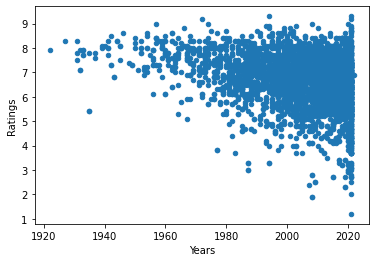

In [10]:
newDfFilms.plot(xlabel='Years', ylabel='Ratings', x='Date',y='Rate', kind='scatter')